In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.set_style('whitegrid')

In [4]:
def coin(p = 0.5, n = 10):
    try:
        n = int(n)
    except:
        n = np.array(n).astype(int)
    return np.random.choice([0,1],size = n, p = [p,1-p])

# test
print(Counter(coin(0.5,100)))
print(Counter(coin(0.5,[10,50]).flatten()))

Counter({0: 51, 1: 49})
Counter({1: 263, 0: 237})


In [47]:
# slowly increase the bias
ps_test = np.logspace(np.log10(0.5)/np.log10(int(1e9)),np.log10(0.6)/np.log10(int(1e9)),10,base = int(1e9))

df = []
for p in ps_test:
    coins = coin(p = p, n = [1e3,1e4])
    temp = pd.DataFrame(coins.mean(1).reshape(-1,1),columns = ['probability'])
    temp['bias'] = p
    df.append(temp)

In [48]:
df = pd.concat(df)

In [49]:
df.head()

,probability,bias
0,0.5070,0.5
1,0.4985,0.5
2,0.4960,0.5
3,0.4965,0.5
4,0.4986,0.5


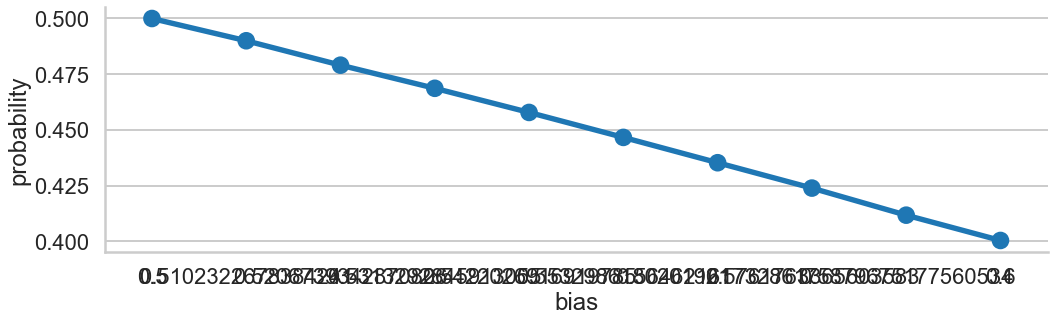

In [50]:
g = sns.catplot(x = 'bias',
                y = 'probability',
                kind = 'point',
                data = df,
                aspect = 3,
                )